In [30]:
import random
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Visualize training result for DQN and DDQN

In [43]:
# NOTE: Need to update this path based on your root directory if you wish to run all codes below.
ROOT_DIR="/home/sanustha/Public/RL/rl_project"
DATA_DIR= ROOT_DIR+"/data"

In [13]:
# Loading DQN training metrics
with open(ROOT_DIR+'/rl_model/dqn/dqn_train_result.pickle', 'rb') as f:
    x=pickle.load(f) 
episode_precision_history_dqn, episode_rewards_dqn = x

In [14]:
# Loading DDQN training metrics
with open(ROOT_DIR+'/rl_model/ddqn/ddqn_agent_train_op.pickle', 'rb') as f:
    x=pickle.load(f) 
episode_precision_history_ddqn, episode_rewards_ddqn, episode_loss = x

In [24]:
avg_ddqn = sum(episode_precision_history_ddqn)/len(episode_precision_history_ddqn)
avg_dqn = sum([float(x) for x in episode_precision_history_dqn])/len(episode_precision_history_dqn)

In [25]:
print(f"Average training precision for DQN: {avg_dqn}")
print(f"Average training precision for DDQN: {avg_ddqn}")

Average training precision for DQN: 75.45454545454545
Average training precision for DDQN: 66.71


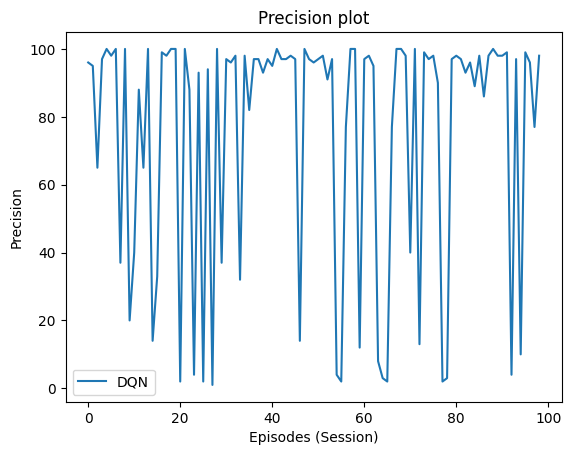

In [18]:
# Plot precision for DQN
plt.plot([float(x) for x in episode_precision_history_dqn], label = 'DQN')
plt.xlabel("Episodes (Session)")
plt.ylabel("Precision")
plt.title("Precision plot")
plt.legend()
plt.savefig(ROOT_DIR+'/rl_model/dqn/precision_train_dqn.png')

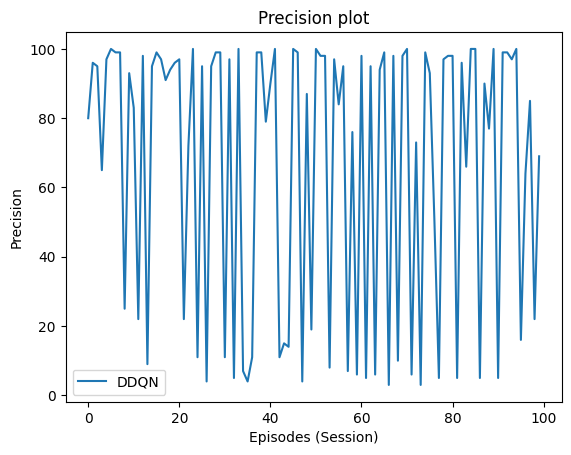

In [17]:
# Plot precision for DDQN
plt.plot(episode_precision_history_ddqn, label = 'DDQN')
plt.xlabel("Episodes (Session)")
plt.ylabel("Precision")
plt.title("Precision plot")
plt.legend()
plt.savefig(ROOT_DIR+'/rl_model/ddqn/precision_train_ddqn.png')

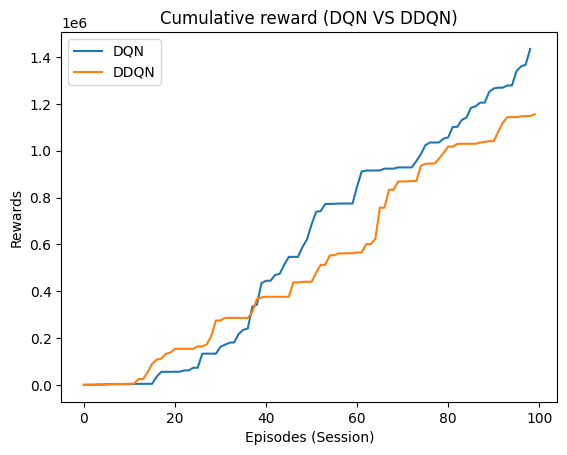

In [19]:
# Calculate the cumulative sum
cum_sum_dqn = np.cumsum([float(x) for x in episode_rewards_dqn])
cum_sum_ddqn = np.cumsum(episode_rewards_ddqn)

# Plot the cumulative sum
plt.plot(cum_sum_dqn, label = 'DQN')
plt.plot(cum_sum_ddqn, label = 'DDQN')
plt.xlabel("Episodes (Session)")
plt.ylabel("Rewards")
plt.title("Cumulative reward (DQN VS DDQN)")
plt.legend()
plt.savefig(ROOT_DIR+'/rl_model/cumulative_reward_train.png')


# Visualize validation set

In [32]:
# Load evaluation result for DQN
with open(ROOT_DIR+'/rl_model/dqn/evaluation_dqn.pickle', 'rb') as f:
    x=pickle.load(f) 
dqn_p, dqn_r = x

avg_dqn = sum(dqn_p)/len(dqn_p)

In [31]:
# Load evaluation result for DDQN
with open(ROOT_DIR+'/rl_model/ddqn/evaluation_ddqn.pickle', 'rb') as f:
    x=pickle.load(f) 
ddqn_p, ddqn_r = x

avg_ddqn = sum(ddqn_p)/len(ddqn_p)


In [33]:
print(f"Average validation precision for DQN: {avg_dqn}")
print(f"Average validation precision for DDQN: {avg_ddqn}")

Average validation precision for DQN: 0.3250000000000007
Average validation precision for DDQN: 0.31595744680851146


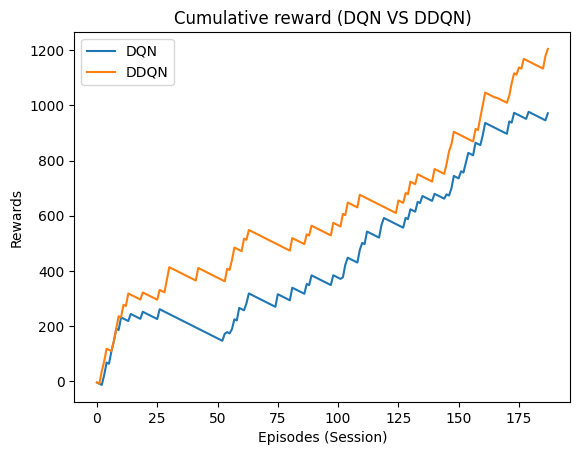

In [29]:
# Calculate the cumulative sum
cum_sum_dqn = np.cumsum(dqn_r)
cum_sum_ddqn = np.cumsum(ddqn_r)

# Plot the cumulative sum
plt.plot(cum_sum_dqn, label = 'DQN')
plt.plot(cum_sum_ddqn, label = 'DDQN')
plt.xlabel("Episodes (Session)")
plt.ylabel("Rewards")
plt.title("Cumulative reward (DQN VS DDQN)")
plt.legend()
plt.savefig(ROOT_DIR+'/rl_model/cumulative_reward_evaluate.png')